# Reading the readme file

instant: record index
dteday : date
season : season (1:spring, 2:summer, 3:fall, 4:winter)
yr : year (0: 2018, 1:2019)
mnth : month ( 1 to 12)
holiday : weather day is a holiday
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : temperature in Celsius
atemp: feeling temperature in Celsius
hum: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd

Reading and Understanding the data

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data Cleaning: Based on Data Dictionary, removing columns instant, dteday (as covered in other columns like yr, mnth),casual & registered (covered in cnt) 

In [6]:
bike.drop(['instant'],axis=1,inplace=True)
bike.drop(['dteday'],axis=1,inplace=True)
bike.drop(['casual'],axis=1,inplace=True)
bike.drop(['registered'],axis=1,inplace=True)

In [7]:
bike.shape

(730, 12)

In [8]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='temp'>

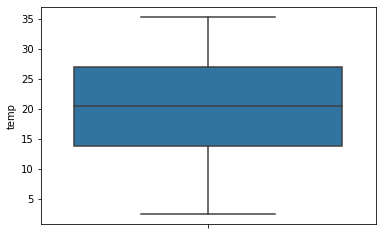

In [10]:
#Handling Outliers for numerical columns
sns.boxplot(y='temp', data=bike)

<AxesSubplot:ylabel='atemp'>

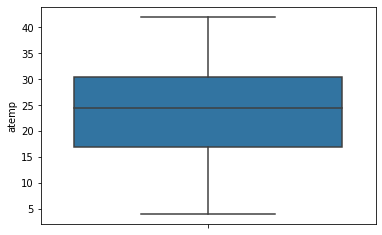

In [11]:
sns.boxplot(y='atemp', data=bike)

<AxesSubplot:ylabel='hum'>

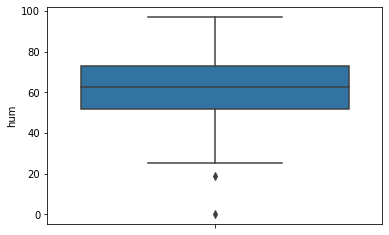

In [12]:
sns.boxplot(y='hum', data=bike)

<AxesSubplot:ylabel='windspeed'>

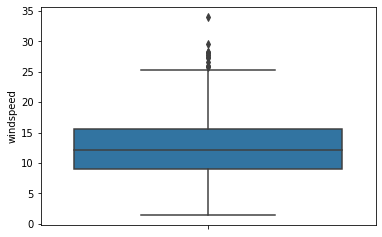

In [13]:
sns.boxplot(y='windspeed', data=bike)

In [14]:
#There are not major outliers to be handled

In [15]:
#Exploratory Data Analysis

In [16]:
#changing columns which were set as numneric but should be categorical data
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bike.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},inplace = True)
bike.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#Visualizing Data
#Analyzing categorical data

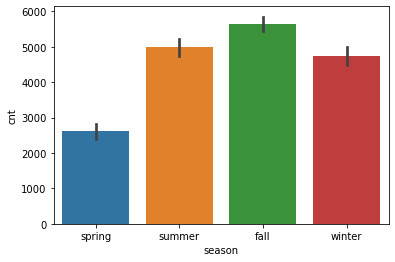

In [18]:
sns.barplot(x='season',y='cnt',data=bike)
plt.show()

In [19]:
#Fall Season have got highest bookings

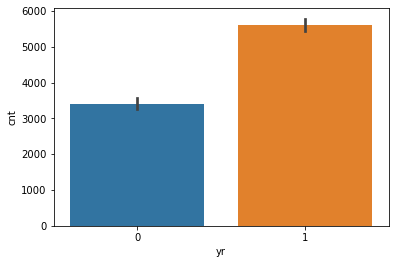

In [20]:
sns.barplot(x='yr',y='cnt',data=bike)
plt.show()

In [21]:
#2019 have got more bookings than 2018

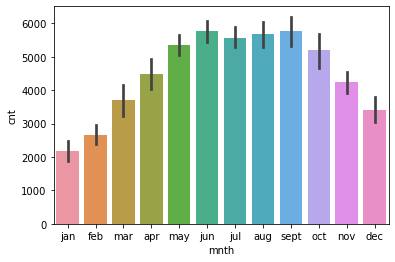

In [22]:
sns.barplot(x='mnth',y='cnt',data=bike)
plt.show()

In [23]:
#Bookings are more in months jun to sept

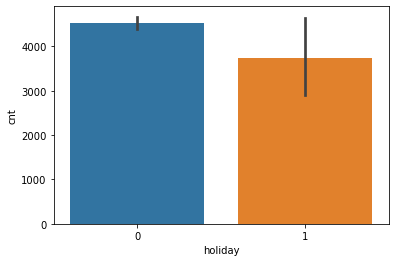

In [24]:
sns.barplot(x='holiday',y='cnt',data=bike)
plt.show()

In [25]:
# More bookings if it's not a holiday

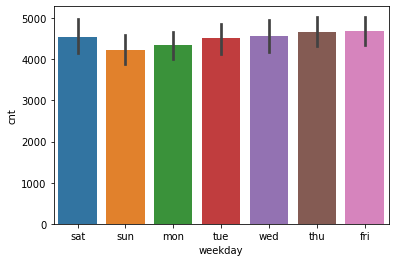

In [26]:
sns.barplot(x='weekday',y='cnt',data=bike)
plt.show()

In [27]:
#Wed to Sat has more bookings

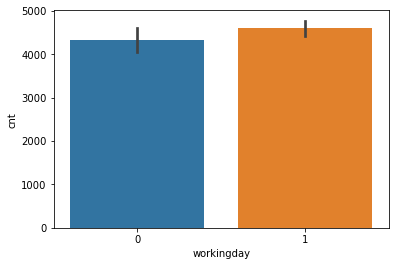

In [28]:
sns.barplot(x='workingday',y='cnt',data=bike)
plt.show()

In [29]:
# Working day has more bookings

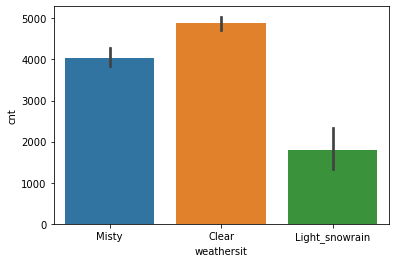

In [30]:
sns.barplot(x='weathersit',y='cnt',data=bike)
plt.show()

In [31]:
#More Bookings on a clear day

In [32]:
#Heatmap

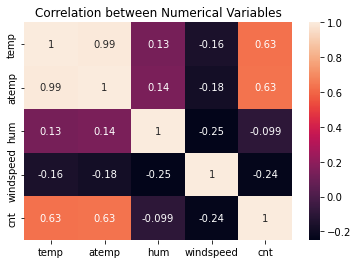

In [33]:
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

There is direct relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

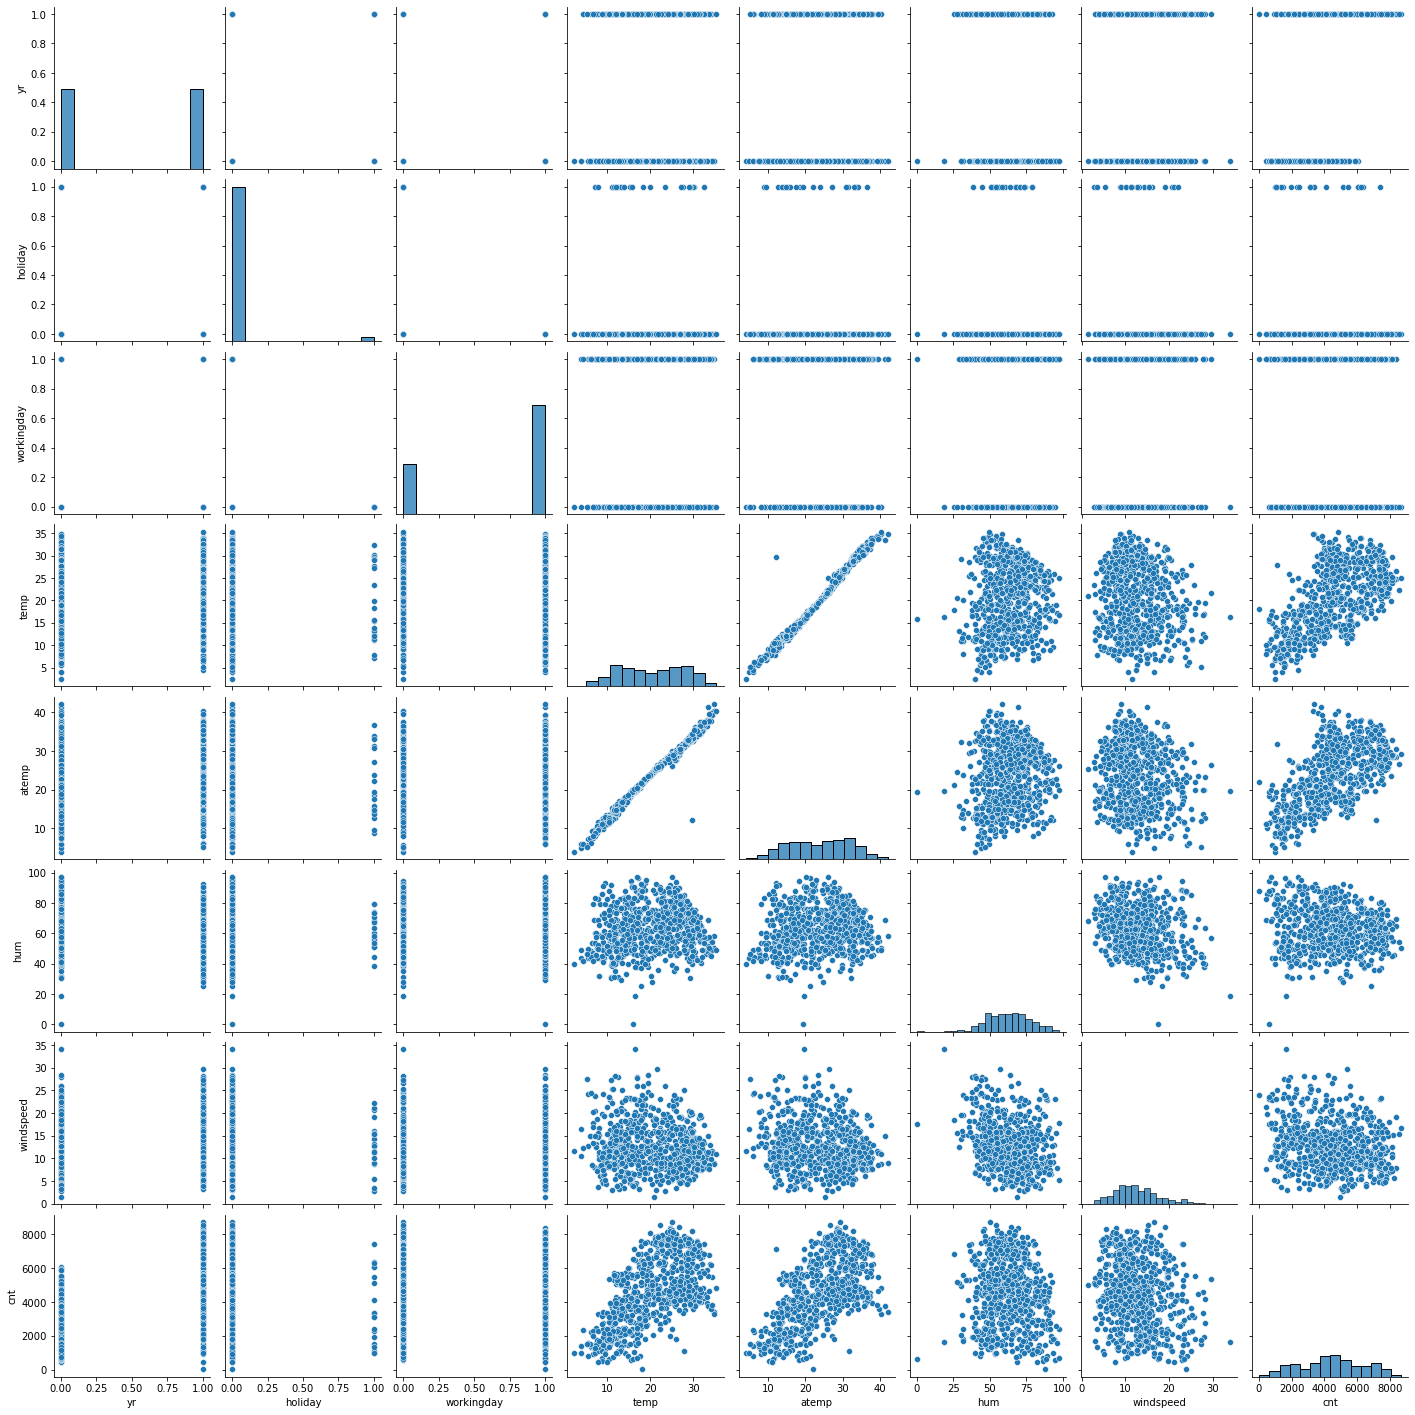

In [34]:
sns.pairplot(bike)
plt.show()

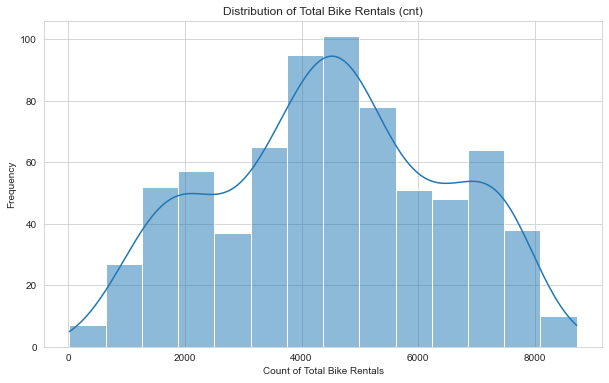

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(bike['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Count of Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()


When we look at the number of bikes rented each day, there's usually a common number that pops up more often than any other. But what's interesting is that there are more days when the number of rentals is on the lower side, rather than those really busy days when rentals shoot up. So, most of the time, the bike rental count is modest, with only a handful of days having very high rental numbers

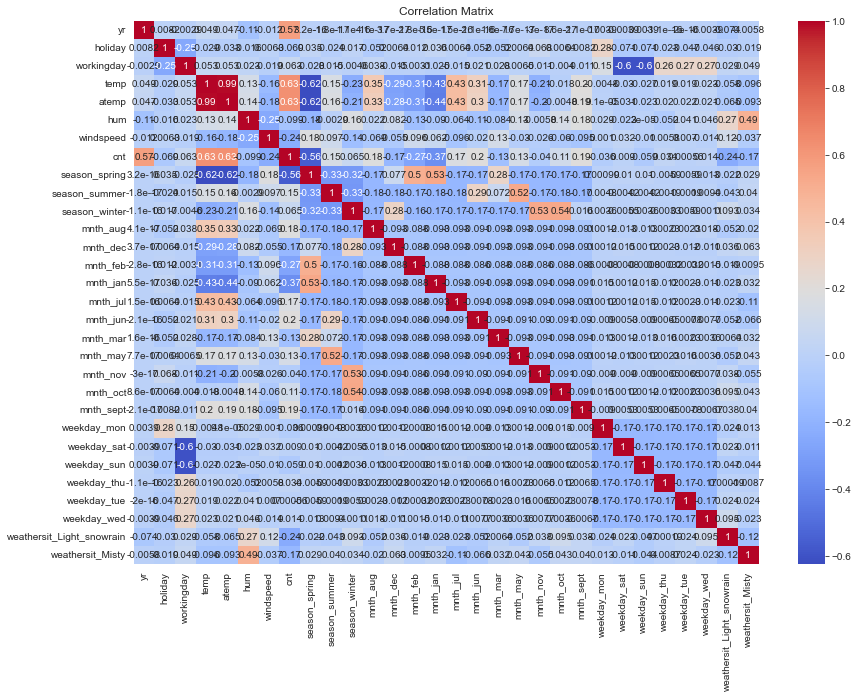

In [79]:
# Plotting a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = bike.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
#Data Preparation - Creating dummy variables for categorical variables

In [36]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday", "weathersit"],drop_first=True)

In [37]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#Replacing True and False values to binary values
bike.replace({False:0, True:1},inplace=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#Splitting data into train and test data

In [40]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
bike_train.shape

(510, 30)

In [42]:
bike_test.shape

(219, 30)

#Rescaling the features
#Here we can see that 'temp', 'atemp','hum','windspeed' & 'cnt', all have different scales. So it is important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use scaling so that the units of the coefficients obtained are all on the same scale. 
#We will use MinMax scaling.

In [43]:

# Apply scaler() to all the columns except the '0-1' variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


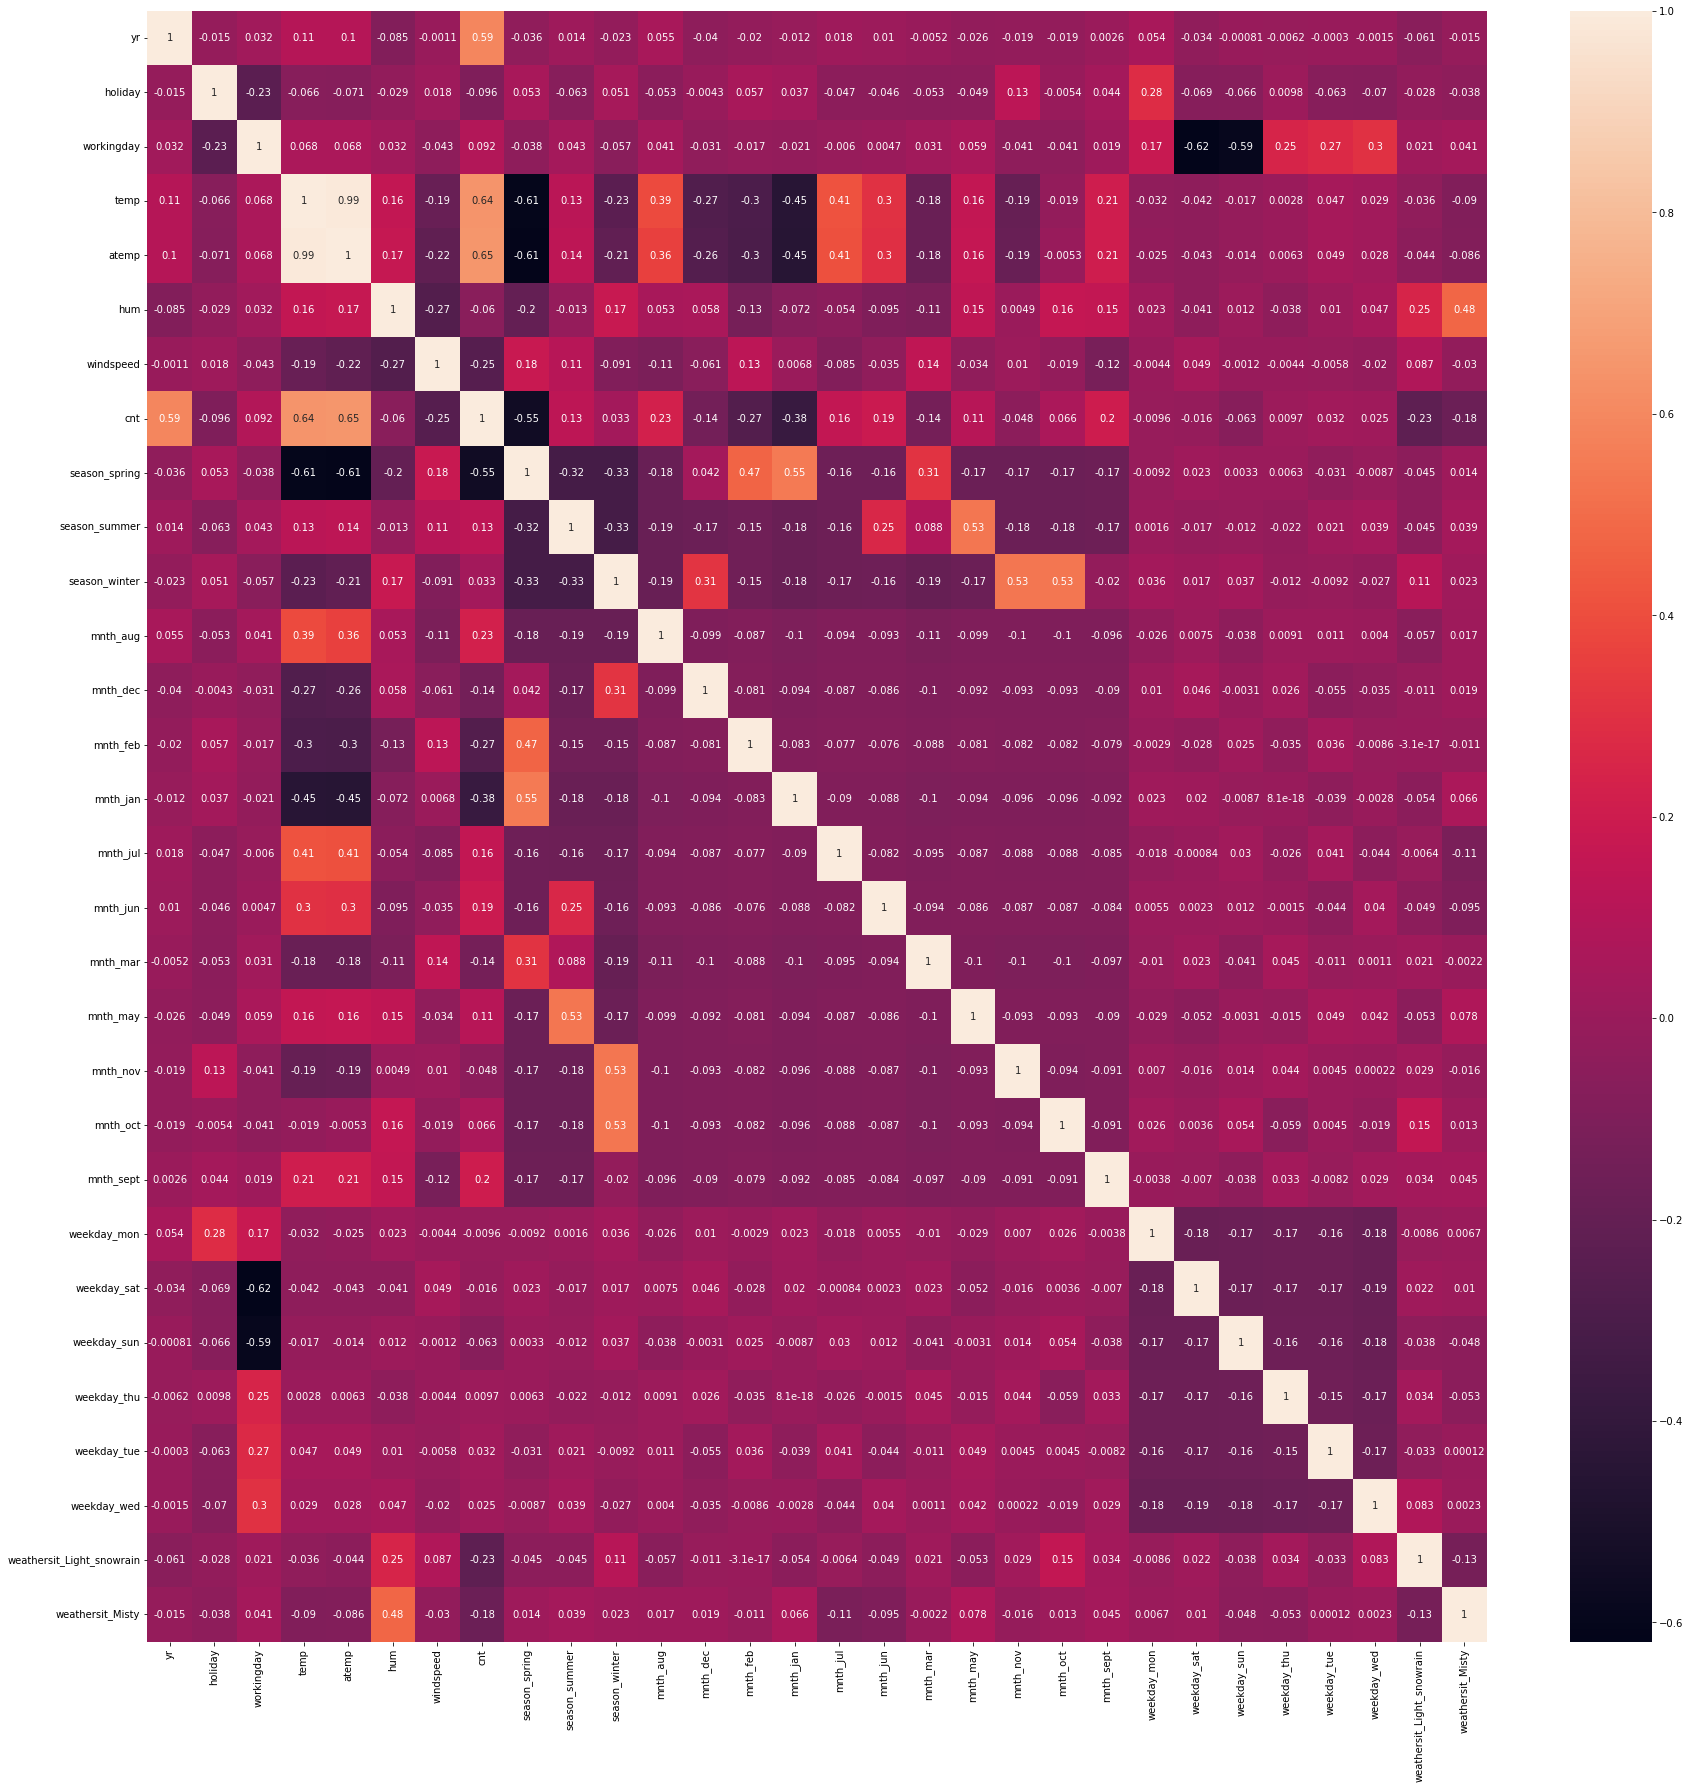

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(bike_train.corr(), annot = True)
plt.show()

In [45]:
# 'cnt' shows correlation with year variable and 'temp'/'atemp'. Also, 'Misty' and 'hum' shows correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.


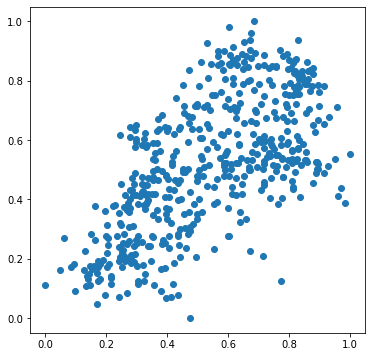

In [46]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()


In [47]:
#Visualization confirms the positive correlation between temp and cnt.

In [48]:
# Dividing into X and Y sets for the model building

y_train = bike_train.pop('cnt')
X_train = bike_train

In [49]:
# Recursive feature elimination RFE - reduce features to 15 using automated approach
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#Print list of variables with their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [50]:
# checking which columns are selected
selected_col = X_train.columns[rfe.support_]
print(selected_col)
# checking which columns are rejected
X_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [51]:
# Function to calculate 'Variance Inflation Factor' of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = cols
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return vif 


In [52]:
#Function to build a model using statsmodel api
import statsmodels.api as sm

def buildModel(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [53]:
# First iteration of VIP calculation and model building
# calculate VIF
calculateVIF(selected_col)

                     Features    VIF
4                         hum  29.40
3                        temp  17.77
2                  workingday   5.31
5                   windspeed   4.73
6               season_spring   4.53
8               season_winter   3.48
7               season_summer   2.84
14           weathersit_Misty   2.29
0                          yr   2.09
12                weekday_sat   1.98
9                    mnth_jan   1.67
10                   mnth_jul   1.59
11                  mnth_sept   1.39
13  weathersit_Light_snowrain   1.25
1                     holiday   1.18


,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_sat,1.98


In [54]:
buildModel(selected_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.31e-191
Time:                        21:40:18   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [55]:
#'workingday' & 'holiday' seems to be related. 'workingday' has high VIF and 'holiday' has high negative coefficient with high p-value (so insignificant). Dropping to 'holiday' to see if it impacts the 
# Second iteration of VIP calculation and model building
col2 = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty']
calculateVIF(col2)
buildModel(col2)

                     Features    VIF
3                         hum  32.14
2                        temp  18.98
1                  workingday  18.41
10                weekday_sat   4.91
4                   windspeed   4.90
5               season_spring   4.80
11                weekday_sun   4.76
7               season_winter   3.71
6               season_summer   3.03
13           weathersit_Misty   2.31
0                          yr   2.09
8                    mnth_jul   1.60
9                   mnth_sept   1.38
12  weathersit_Light_snowrain   1.25
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.13e-191
Time:                        21:40:18   Log-Likeli

In [56]:
# VIF of 'workingday' has reduced but still significant so removing it. Removing'weekday_sun', 'season_spring' & 'mnth_jul' as they have high p-value and are insignificant. VIF of 'temp' & 'hum' is expected to reduce
# Third iteration of VIP calculation and model building
col3 = ['yr', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_Light_snowrain',
       'weathersit_Misty']
calculateVIF(col3)
buildModel(col3)

                    Features    VIF
2                        hum  14.24
1                       temp   7.98
3                  windspeed   3.58
9           weathersit_Misty   2.10
0                         yr   2.01
5              season_winter   1.66
4              season_summer   1.58
6                  mnth_sept   1.20
7                weekday_sat   1.18
8  weathersit_Light_snowrain   1.15
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.88e-187
Time:                        21:40:18   Log-Likelihood:                 496.56
No. Observations:                 510   AIC:                            -971.1
Df Residuals:                     499   BIC:       

In [57]:
# VIF of 'hum' & 'temp' has reduced but still significant so removing 'hum' as that seems to be related to 'temp' too. Removing'weekday_sat' as it haa high p-value and are insignificant. VIF of 'temp' is expected to reduce
# Fourth iteration of VIP calculation and model building
col4 = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weathersit_Light_snowrain',
       'weathersit_Misty']
calculateVIF(col4)
buildModel(col4)

                    Features   VIF
1                       temp  3.68
2                  windspeed  3.03
0                         yr  2.00
3              season_summer  1.56
7           weathersit_Misty  1.47
4              season_winter  1.37
5                  mnth_sept  1.20
6  weathersit_Light_snowrain  1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          8.04e-185
Time:                        21:40:18   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                

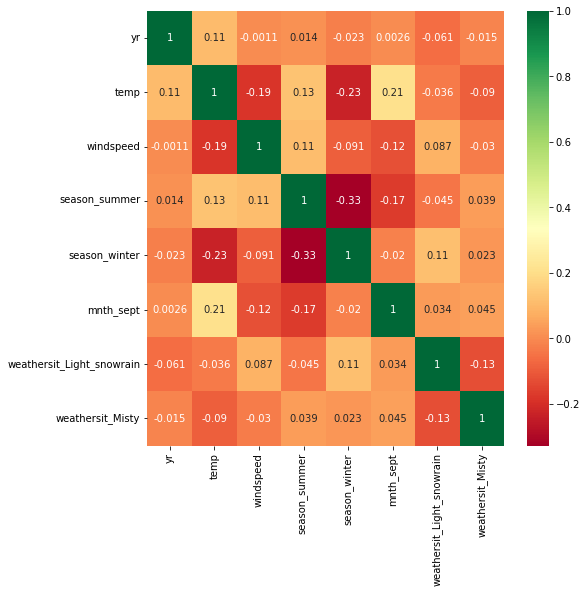

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train[col4].corr(),annot = True, cmap="RdYlGn")
plt.show()


In [59]:
#This model can be accepted as VIF of all variables is less than 5 and multi-collinaearity between the predictors seems to be low (from heatmap). p-value of all the variables is 0 so highly significant.
#F-Statistics value of 297.4 (greater than 1) and the p-value of 8.04e-185 i.e almost equals to zero, states that the overall model is significant. R-square is 0.826 which is good.
# We can accept this model

In [60]:
# Step : Residual Analysis of the train data and validation
X_train_4 = sm.add_constant(X_train[col4])
model4 = sm.OLS(y_train,X_train_4).fit()
y_train_pred = model4.predict(X_train_4)

In [61]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\tejag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


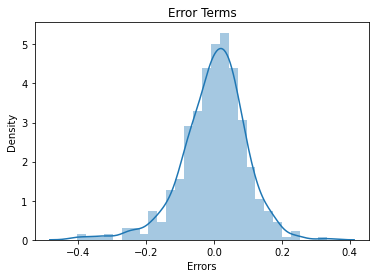

In [62]:
plot_res_dist(y_train, y_train_pred)

In [63]:
#Step : Making Predictions Using the Final Model
#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [64]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [65]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [66]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test_m4 = X_test[col4]

In [67]:
y_test.shape

(219,)

In [68]:
X_test_m4.shape

(219, 8)

In [69]:
# Adding constant variable to test dataframe
#X_test_m4 = sm.add_constant(X_test)
X_test_m4 = sm.add_constant(X_test_m4)


In [70]:
# Creating X_test_m4 dataframe by taking only columns in Model4
#X_test_m4 = X_test_m4[col4]

In [71]:
# Making predictions using the fourth model
y_pred_m4 = model4.predict(X_test_m4)

In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_m4)
round(r2,4)

0.7906

Step 9: Model Evaluation¶
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

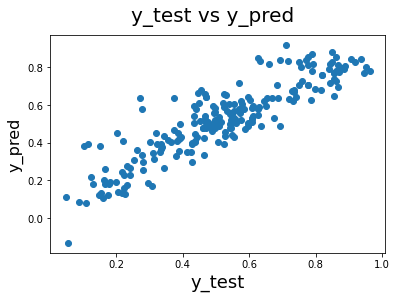

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [74]:
round(model4.params,4)

const                        0.1214
yr                           0.2331
temp                         0.5527
windspeed                   -0.1553
season_summer                0.0882
season_winter                0.1294
mnth_sept                    0.0977
weathersit_Light_snowrain   -0.2795
weathersit_Misty            -0.0780
dtype: float64

In [75]:
#We can see that the equation of our best fitted line is:

#cnt = 0.1214 + 0.2331 * year + 0.5527 * temp - 0.1553 * windspeed + 0.0882 * season_summer +0.1294 * season_winter + 0.0977 * mnth_sept - 0.2795 * weathersit_light_snowrain - 0.0780 * weathersit_misty

In [76]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7585


Overall we have a decent model,

Comparision between Training and Testing dataset:
- Train dataset R^2          : 
- Test dataset R^2           : 
- Train dataset Adjusted R^2 :    
- Test dataset Adjusted R^2  : 

Demand of bikes depend on year, temp, windspeed, sep, Light_snowrain, Misty, summer and winter.

Assignment-based Subjective Question
1.From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

In [81]:
import statsmodels.api as sm

# Assuming your final model is stored in a variable named 'model4'
# Make sure to replace 'model4' with the actual variable name of your final model

# Extracting the coefficients
coefficients = model4.params
print(coefficients)
# Interpreting the coefficients
interpretations = []
for variable, coef in coefficients.items():
    if variable == 'const':
        interpretations.append(f"The model's intercept is {coef:.2f}. This value represents the baseline demand for bikes when all other variables are zero.")
    else:
        change = "increase" if coef > 0 else "decrease"
        interpretations.append(f"A one-unit change in '{variable}' is associated with a {abs(coef):.2f} unit {change} in the demand for bikes.")

# Printing the interpretations
for interpretation in interpretations:
    print(interpretation)


const                        0.121392
yr                           0.233108
temp                         0.552725
windspeed                   -0.155260
season_summer                0.088176
season_winter                0.129402
mnth_sept                    0.097698
weathersit_Light_snowrain   -0.279492
weathersit_Misty            -0.078044
dtype: float64
The model's intercept is 0.12. This value represents the baseline demand for bikes when all other variables are zero.
A one-unit change in 'yr' is associated with a 0.23 unit increase in the demand for bikes.
A one-unit change in 'temp' is associated with a 0.55 unit increase in the demand for bikes.
A one-unit change in 'windspeed' is associated with a 0.16 unit decrease in the demand for bikes.
A one-unit change in 'season_summer' is associated with a 0.09 unit increase in the demand for bikes.
A one-unit change in 'season_winter' is associated with a 0.13 unit increase in the demand for bikes.
A one-unit change in 'mnth_sept' is ass

3. Looking at the pair-plot among the numerical variables, which one has the highest correlation 
with the target variable

In [85]:
print(bike.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')


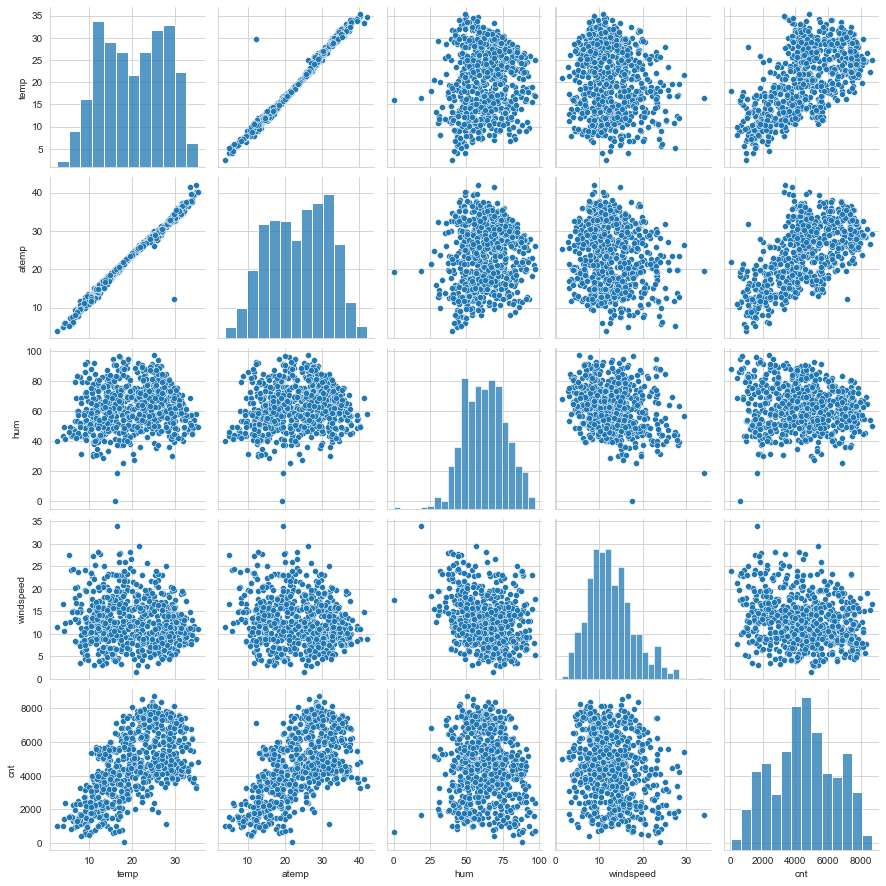

cnt                          1.000000
atemp                        0.630685
temp                         0.627044
yr                           0.569728
mnth_jun                     0.195568
mnth_sept                    0.194664
mnth_aug                     0.182100
mnth_jul                     0.166236
season_summer                0.145325
mnth_may                     0.132553
mnth_oct                     0.108846
season_winter                0.064619
workingday                   0.062542
weekday_thu                  0.033551
weekday_wed                  0.014012
weekday_sat                  0.009012
weekday_tue                  0.000560
weekday_mon                 -0.035991
mnth_nov                    -0.040344
weekday_sun                 -0.059146
holiday                     -0.068764
hum                         -0.098543
mnth_mar                    -0.128456
weathersit_Misty            -0.170686
mnth_dec                    -0.173878
windspeed                   -0.235132
weathersit_L

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Plotting the pair-plot
sns.pairplot(bike, vars=numerical_variables)
plt.show()

# Calculating correlation with the target variable
correlation = bike.corr()['cnt'].sort_values(ascending=False)
print(correlation)


4. How did you validate the assumptions of Linear Regression after building the model on the 
training set

In [88]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          8.04e-185
Time:                        00:46:38   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [89]:
# If model4 is a statsmodels object
feature_list = model4.params.index.tolist()
print("Features used in model4:", feature_list)

Features used in model4: ['const', 'yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weathersit_Light_snowrain', 'weathersit_Misty']


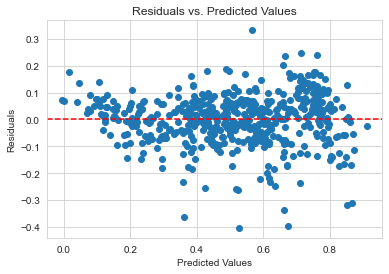

In [91]:
# Linearity
# Visualizing the relationship between predicted values and residuals
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'model4' is your fitted regression model and 'X_train' is your training data
fitted_vals = model4.predict(sm.add_constant(X_train_4))
residuals = model4.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [92]:
# Independence
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)  # Values close to 2 indicate no autocorrelation


2.0332110483834827

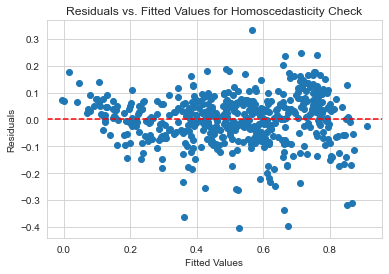

In [93]:
# Homoscedasticity
# Visualizing the residuals vs. fitted values for constant variance
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Homoscedasticity Check')
plt.show()


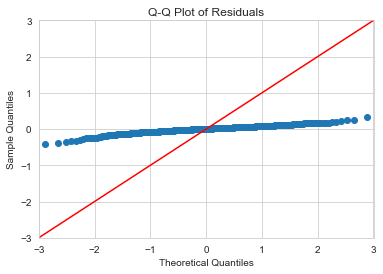

ShapiroResult(statistic=0.9643911719322205, pvalue=8.869305845315978e-10)

In [94]:
# Normality of Residuals
# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test (optional)
from scipy.stats import shapiro
shapiro(residuals)


In [97]:
# Multicollinearity
# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X_train' is your training data without the constant added for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_4.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
print(vif_data)


                     Feature        VIF
0                      const  16.398491
1                         yr   1.016143
2                       temp   1.192703
3                  windspeed   1.085834
4              season_summer   1.186111
5              season_winter   1.201719
6                  mnth_sept   1.104313
7  weathersit_Light_snowrain   1.047105
8           weathersit_Misty   1.037445


5. Based on the final model, which are the top 3 features contributing significantly towards 
explaining the demand of the shared bikes

In [98]:
import statsmodels.api as sm

# Assuming 'model4' is your fitted regression model
# Print the model's summary to get the coefficients
print(model4.summary())

# Get the model's coefficients and their absolute values
coefficients = model4.params
coefficients_abs = abs(coefficients)

# Sort the coefficients by their absolute values in descending order
sorted_coefficients = coefficients_abs.sort_values(ascending=False)

# Print the top 3 features contributing to bike demand
print("Top 3 features contributing to bike demand:")
print(sorted_coefficients.head(3))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          8.04e-185
Time:                        01:41:00   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 